# 3. Regresión

El objetivo principal de la regresión es predecir el valor de uno o más targets continuos $t$ dado el valor de un vector $D-dimensional$ de entrada $x$. La forma más simple de modelos de regresión lineal consisten de funciones lineales en las entradas. Sin embargo, es posible obtener otras clases de funciones lineales a partir de combinaciones lineales de un conjunto de funciones no lineales de entrada llamadas funciones base. Tales modelos, son lineales en los parámetros, lo que permite que tengan las mismas propiedades analíticas con las que se tratan en el caso de funciones de entrada lineal, y aún así, ser no lineales respecto a las variables de entrada. 

Dado un conjunto de datos de entrada que contenga $N$ observaciones ${x_n}$, donde $n=1,...,N$ junto con sus vectores respuesta correspondientes ${t_n}$, el objetivo es predecir el valor $t$ para un nuevo valor de $x$. En la aproximación más simple, esto se puede realizar construyendo una función apropiada $y(x)$ cuyos valores para nuevas entradas de $x$ constituyen predicciones para valores correspondientes de $t$.

## 3.1 Modelos de funciones base lineales. 

El modelo más simple para regresión involucra una combinación lineal de variables de entrada:

\begin{equation}
y(x,w)=w_0 + w_1 x_1+w_2 x_2+...+w_D x_D
\end{equation}

En general, esto es lo que se conoce como regresión lineal. La propiedad clave de este modelo es que es una función lineal de los parámetros $w_i$ y también es una función lineal de $x_i$ y esto impone limitaciones importantes al modelo. Sin embargo, es posible extender este modelo considerando combinaciones lineales de funciones no lineales fijas de las variables de entrada de la forma

\begin{equation}
y(x,w)=w_0 + \sum_{j=1}^{M-1}{w_j \phi_j(x)}
\end{equation}

donde $\phi_j(x)$ son conocidas como funciones base. El número total de parámetros de este modelo, claramente es M. El parámetro $w_0$ permite ajustar un offset en los datos y en general se conoce como parámetro "bias" (no confundir con el bias estadístico). En general, es conveniente expresar $\phi_0(x)=1$, de manera que 

\begin{equation}
y(x,w)=\sum_{j=0}^{M-1}{w_j \phi_j(x)}=w^T \phi(x)
\end{equation}

donde $w=(w_0,...,w_{M-1})^T$ y $\phi=(\phi_0,...,\phi_{M-1})^T$. En muchas aplicaciones prácticas, es posible aplicar alguna forma de preprocesamiento fijo que permita hacer extracción de características (feature extraction), de las variables de datos originales. Si las variables originales se componen del vector x, entonces, las características pueden ser expresadas en términos de los funciones base ${\phi_j(x)}$.

La regresión polinomial es un caso particular de este modelo, en el cual se tiene una única variable de entrada $x$ y las funciones base toman la forma de potencias de $x$ tal que $\phi_j(x)=x^j$. Una limitación de las funciones base polinomiales es que son funciones globales de la variable de entrada, de manera que los cambios en una región del espacio de entrada afecta las demás regiones. Esto puede ser resuelto al dividir el espacio de entrada en diferentes regiones y ajustar a diferentes polinomios en cada región. 

Un ejemplo de una posible función base sería 

\begin{equation}
\phi_j(x)=exp{-(x-\mu_j)^2/2s^2}
\end{equation}

donde $\mu_j$ se refiere a la ubicación de las funciones base en el espacio de entrada y $s$ a su escala espacial. Otra posibilidad es una base sigmoidal de la forma 

\begin{equation}
\phi_j(x)=\sigma((x-\mu_j)/s)
\end{equation}

donde $\sigma(a)$ es la función sigmoide logística. También se puede utilizar la función "tanh" que se relaciona con la función logística como $tanh(a)=a\sigma(a)-1$. También es posible escoger una base en fourier que daría lugar a expansiones en funciones sinoidales. Dados estos argumentos, es claro que lo que se ha visto previamente acerca de Maximum likelihood y Mínimos cuadrados es claramente aplicable para cualquier $\phi(x)$ que constituya una base de funciones apropiada, sólamente que hasta ahora hemos manejado $\phi(x)=x$.


# Mínimos cuadrados con regularización.

Partamos de una función de error $E_D(w)$ y añadamos un término de regularización para controlar el overfitting, de manera que el error total de la función sea $E_D(w)+\lambda E_W(w)$

donde $\lambda$ es el coeficiente de regularización y controla la importancia relativa del error dependiente de los datos $E_D(w)$ y el término de regularización es $E_W(w)$. Una forma simple de regularización constituye en sumar la suma de cuadrados de los pesos, ie. ($E_W(w)=1/2 w^Tw$). De manera que, considerando un 

\begin{equation}
E_D(w)=\frac{1}{2}\sum_{n=1}^{N}{(t_n-w^T \phi(x_n))^2}
\end{equation}

de manera que el error total es 

\begin{equation}
E(w)=\frac{1}{2}\sum_{n=1}^{N}{(t_n-w^T \phi(x_n))^2}+\frac{\lambda}{2}{w^T w}
\end{equation}

Esta escogencia de regularización se conoce como "weight decay" debido a que en los algoritmos secuenciales, hace que los pesos tiendan a decaer hacia cero. En estadística, proveen un ejemplo de "encogimiento de parámetros" (parameter shrinkage) debido a que encoge los parámetros hacia cero. Esto tiene la ventaja de que la función de error permanece siendo una función cuadrática de $w$, por lo que el minimizador puede ser encontrado de forma cerrada. La solución al problema de mímimos cuadrados, se vuelve entonces:


\begin{equation}
w=(\lambda I+\Phi^T\Phi)^{-1}\Phi^T t
\end{equation}

Una forma más general de un regularizador tiene la siguiente forma:

\begin{equation}
E(w)=\frac{1}{2}\sum_{n=1}^{N}{(t_n-w^T \phi(x_n))^2}+\frac{\lambda}{2}{|w_j|^q}
\end{equation}

donde $q=2$ corresponde al regularizador cuadrático. 


Ridge:
\begin{equation}
E(w)=\frac{1}{2}\sum_{n=1}^{N}{(t_n-w^T \phi(x_n))^2}+\frac{\lambda}{2}{w^T w}
\end{equation}

Lasso:
\begin{equation}
E(w)=\frac{1}{2}\sum_{n=1}^{N}{(t_n-w^T \phi(x_n))^2}+\frac{\lambda}{2}{|w|}
\end{equation}



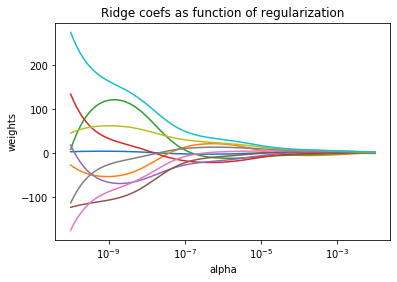

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X=1./(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y=np.ones(10)

n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)

coefs=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
    
plt.figure()
plt.plot(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefs as function of regularization')
plt.xscale('log')
plt.show()


# Criterios de información:

## Bayesian Information Criterion (BIC)
El BIC es un criterio para la selección de modelos entre un conjunto finito de modelos. Para resolver el problema del overfitting, el BIC y el AIC introducen un término de penalización para el número de parámetros en el modelo, el término de penalización es mayor en el BIC que en el AIC. 

La fórmula para el BIC es

\begin{equation}
-2\cdot ln(p(x|M))\approx BIC =-2\cdot ln(\hat{L})+kln(n)
\end{equation}

Donde $\hat{L}$ es el valor máximo de la función de verosmilitud del modelo $p(x|\hat{\theta},M)$, donde $\hat{\theta}$ son los valores de los parámetros que maximizan la función de verosimilitud, $p(x|M)$ es la probabilidad marginal de los datos observados dado el modelo M, $k$ es el número de parámetros libres a ser estimados, $n$ es el número de datos y $x$ son los datos observados. 

Dados dos modelos, en general se prefiere el modelo con menor BIC.


## Akaike Information Criterion (AIC)

El AIC es una medida de la calidad relativa de un modelo estadístico para un conjunto dado de datos. El AIC maneja un trade-off entre bondad de ajuste del modelo y su complejidad. En el caso general, el AIC es 

\begin{equation}
AIC=2k-2ln(L)
\end{equation}

donde $k$ es el número de parámetros en el modelo estadístico y $L$ es el valor máximo de la función de verosimilitud para el modelo estimado. 

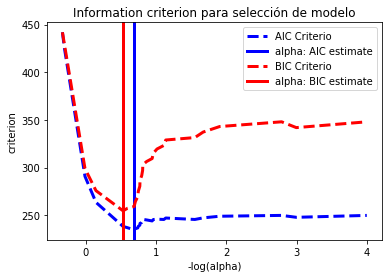

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

EPSILON=1e-4

diabetes=datasets.load_diabetes()
X=diabetes.data
y=diabetes.target

rng=np.random.RandomState(42)
X=np.c_[X,rng.randn(X.shape[0],14)]

X /= np.sqrt(np.sum(X**2,axis=0))

model_bic=LassoLarsIC(criterion='bic')
model_bic.fit(X,y)
alphla_bic_=model_bic.alpha_

model_aic=LassoLarsIC(criterion='aic')
model_aic.fit(X,y)
alphla_aic_=model_aic.alpha_

def plot_ic_criterion(model,name,color):
    alpha_=model.alpha_+EPSILON
    alphas_=model.alphas_+EPSILON
    
    criterion_=model.criterion_
    plt.plot(-np.log10(alphas_),criterion_,'--',color=color,linewidth=3,label='%s Criterio'%name)
    plt.axvline(-np.log10(alpha_),color=color,linewidth=3,label='alpha: %s estimate'%name)

    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic,'AIC','b')
plot_ic_criterion(model_bic,'BIC','r')
plt.legend()
plt.title('Information criterion para selección de modelo')
plt.show()

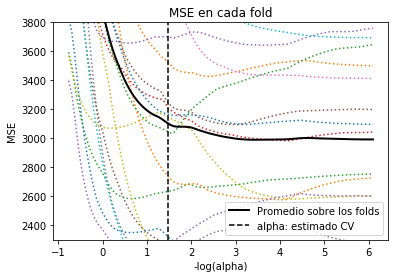

In [28]:
model=LassoCV(cv=20).fit(X,y)

m_log_alphas=-np.log(model.alphas_+EPSILON)

plt.figure()
ymin,ymax=2300,3800
plt.plot(m_log_alphas,model.mse_path_,":")
plt.plot(m_log_alphas,model.mse_path_.mean(axis=-1),'k',label='Promedio sobre los folds',linewidth=2)
plt.axvline(-np.log10(model.alpha_+EPSILON),linestyle='--',color='k',label='alpha: estimado CV')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE en cada fold')
plt.axis('tight')
plt.ylim(ymin,ymax)
plt.show()


### Ejemplo: Funciones base polinomiales


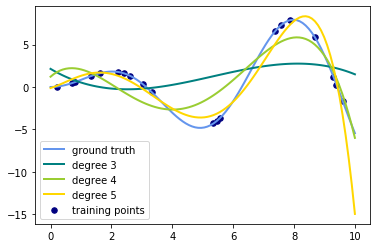

In [36]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    return x*np.sin(x)



x_plot=np.linspace(0,10,100)

x=np.linspace(0,10,100)

rng=np.random.RandomState(0)
rng.shuffle(x)
x=np.sort(x[:20])
y=f(x)


X=x[:,np.newaxis]
X_plot=x_plot[:,np.newaxis]

colors=['teal','yellowgreen','gold']
lw=2
plt.plot(x_plot,f(x_plot),color='cornflowerblue',linewidth=lw,label="ground truth")
plt.scatter(x,y,color='navy',s=30,marker='o',label="training points")

for count, degree in enumerate([3,4,5]):
    model=make_pipeline(PolynomialFeatures(degree),Ridge())
    model.fit(X,y)
    y_plot=model.predict(X_plot)
    plt.plot(x_plot,y_plot,color=colors[count],linewidth=lw,label="degree %d"%degree)

plt.legend(loc='lower left')

plt.show()




# Referencias

- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py

- https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

- https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html